<a href="https://colab.research.google.com/github/oscaredumurguia/Simulab/blob/main/Tarea_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import yfinance as yf

In [35]:
!pip install yfinance

/tmp/ipython-input-51653534.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2015-11-04',end='2025-11-04')['Close']
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

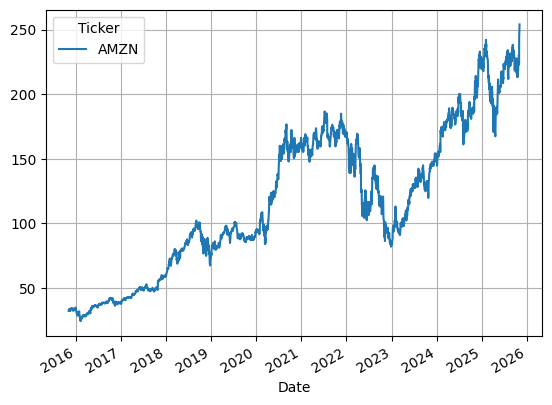

In [36]:
tickers=['AMZN']
data=yf.download(tickers,start='2015-11-04',end='2025-11-04')['Close']
data.plot(grid=True)

<Axes: xlabel='Date'>

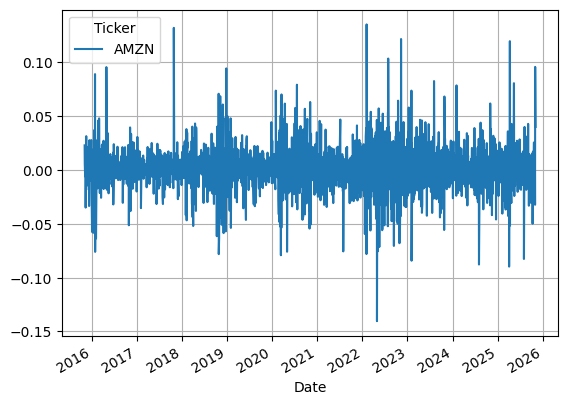

In [37]:
delta=data.pct_change().dropna()
delta.plot(grid=True)

In [38]:
N_dias=30
N_escenarios=100000
delta_AMZN=np.random.normal(delta['AMZN'].mean(),delta['AMZN'].std(),(N_dias,100000))
delta_AMZN[:2,:10]

array([[-0.00245806,  0.03267098, -0.02904344,  0.00999955,  0.03806831,
        -0.00131734,  0.03068563, -0.02550145,  0.00168232,  0.02549555],
       [-0.00589067,  0.0016662 ,  0.02545608, -0.00812395, -0.00551869,
         0.01166986,  0.00540863,  0.02001279, -0.05100334,  0.00649642]])

In [39]:
precios_AMZN = data['AMZN'].iloc[-1] * (delta_AMZN + 1).cumprod(axis=0)
print(precios_AMZN[:2, :10])

[[253.37565284 262.29842795 246.62296724 256.53988613 263.66935142
  253.66539604 261.79415021 247.52263086 254.42731007 260.47586916]
 [251.88310041 262.73546833 252.9010203  254.4557693  262.21424163
  256.62563479 263.21009858 252.47625001 241.45066646 262.16802983]]


<Axes: >

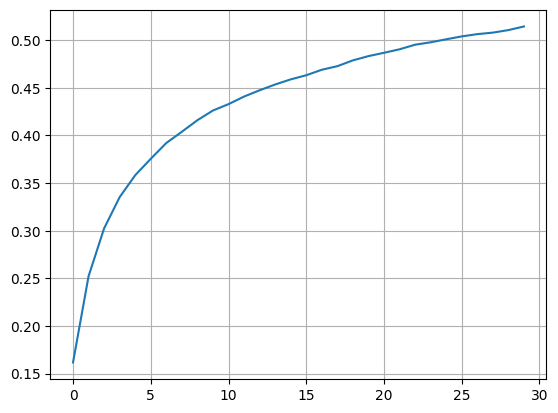

In [40]:
B_AMZN=precios_AMZN>data['AMZN'].iloc[8]*8.01
proba_AMZN=pd.Series(B_AMZN.mean(axis=1))
proba_AMZN.plot(grid=True)

Usando montecarlo la probablidad de que sea rriba de 8% es más del 50 al final de los 30 días